In [1]:
import pandas as pd
import re
import nltk

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Load Data

In [2]:
activities = pd.read_csv('./data/activities.csv')

In [3]:
health = pd.read_csv('./data/health.csv')

In [4]:
home_safety = pd.read_csv('./data/home_safety.csv')

In [5]:
quantity_learning = pd.read_csv('./data/quantity_learning.csv')

In [6]:
radio_lessons = pd.read_csv('./data/radio_lessons.csv')

In [7]:
radio_likes = pd.read_csv('./data/radio_likes.csv')

In [8]:
school_safety = pd.read_csv('./data/school_safety.csv')

In [9]:
schoolwork = pd.read_csv('./data/schoolwork.csv')

In [10]:
learning_mat = pd.read_csv('./data/learning_mat.csv')

In [11]:
radio_school = pd.read_csv('./data/radio_school.csv')

## Count vectorization

In [12]:
stopwords = stopwords.words('english')

In [13]:
def removal(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    return re.sub(r'\d+', '', text)

In [14]:
def bow_vectorization(data, n_grams):
    vectorizer = CountVectorizer(stop_words = stopwords, lowercase = True, strip_accents='unicode', ngram_range=n_grams, preprocessor=removal)
    data_tokens = vectorizer.fit_transform(data.dropna())
    print(len(vectorizer.vocabulary_),'words in dictionary.')
    return pd.DataFrame(data_tokens.todense(), columns=vectorizer.get_feature_names())
    

## Questions

#### 1. Are you doing other things at home to learn, aside from radio lessons? What are you doing?

In [15]:
activities_1 = bow_vectorization(data = activities.iloc[:,-1], n_grams=(2, 3))
activities_2 = bow_vectorization(data = activities.iloc[:,-1], n_grams=(1, 1))

2175 words in dictionary.
456 words in dictionary.


In [16]:
activities_1.sum().sort_values(ascending=False)[:25]

reading books               92
reading notes               47
text books                  44
reading textbooks           35
read books                  32
previous work               32
reading text                31
revising books              30
holiday package             29
study books                 29
group discussion            25
revising notes              25
reading text books          24
previous lessons            20
revised previous            16
studying books              16
exercise books              15
revise books                15
fetching water              14
revised previous lessons    13
holiday packages            13
revising previous           13
reading home                12
home work                   11
free time                   11
dtype: int64

In [17]:
activities_2.sum().sort_values(ascending=False)[:25]

reading       595
books         314
notes         132
revising      106
home           96
work           92
read           88
studies        87
studying       76
previous       74
revision       69
cooking        63
study          59
school         55
text           53
textbooks      51
holiday        45
revise         42
group          41
package        37
lessons        36
exercise       32
discussion     32
time           30
book           30
dtype: int64

In [18]:
words_graph = [dict(activities_1.sum().sort_values(ascending=False)[:20])] + [dict(activities_2.sum().sort_values(ascending=False)[:20])]

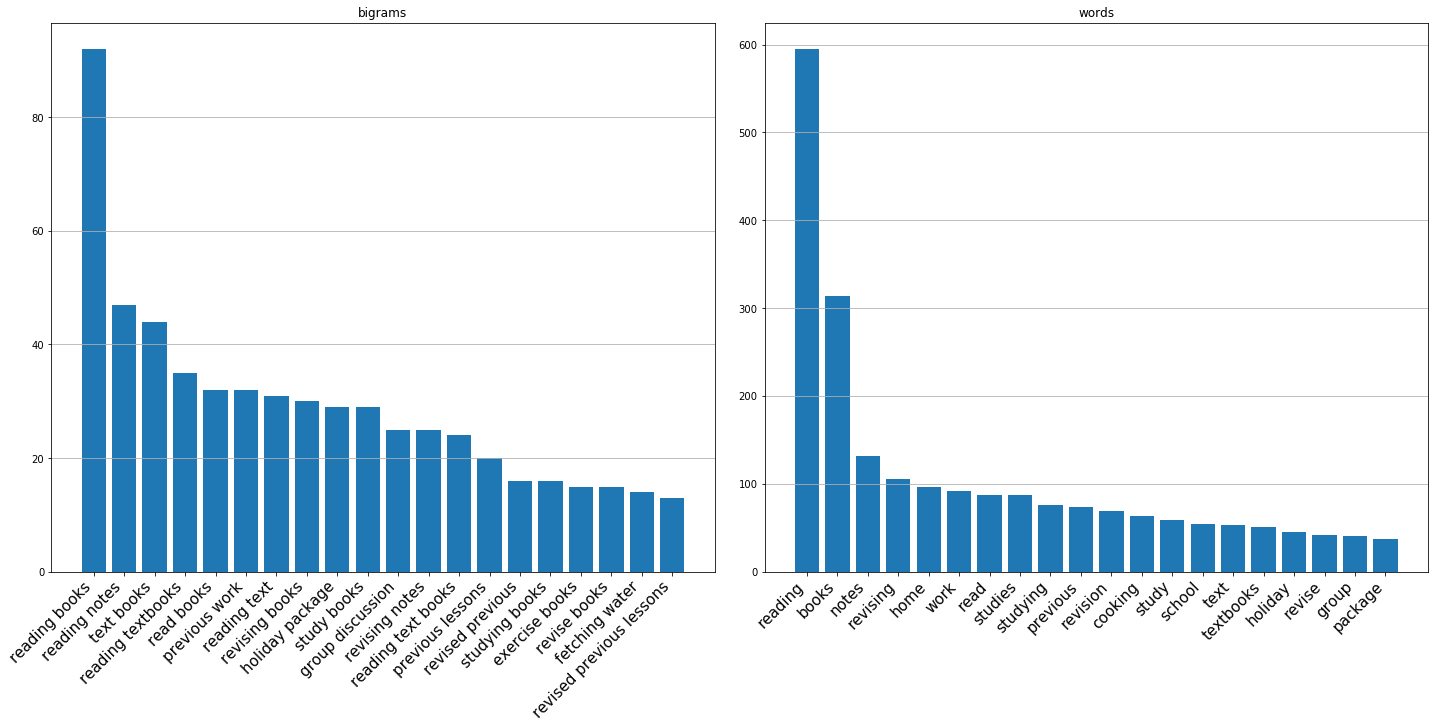

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [20]:
activities_stop_words = ['book','home','studying','study','textbooks']

#### 2. Do you feel worried about your health due to studying/being at home during COVID-19? Why or why not?

In [21]:
health_1 = bow_vectorization(data = health.iloc[:,-1], n_grams=(2, 3))
health_2 = bow_vectorization(data = health.iloc[:,-1], n_grams=(1, 1))

3432 words in dictionary.
816 words in dictionary.


In [22]:
health_1.sum().sort_values(ascending=False)[:25]

safe home                 62
home safe                 40
corona virus              38
stay home                 29
staying home              28
covid infection           24
want live                 22
feel safe                 19
lot things                17
preventive measures       16
staying home safe         15
home stay                 14
missing lot               14
missing lot things        14
stay safe                 14
social distancing         14
social distance           13
among people              13
feel safe home            13
home stay safe            13
infection among people    12
infection among           12
stay home stay            12
covid infection among     11
preventives measures      10
dtype: int64

In [23]:
health_2.sum().sort_values(ascending=False)[:26]

home         301
covid        188
safe         162
people       112
disease       98
school        67
corona        67
virus         65
want          53
worried       53
infection     50
measures      50
stay          49
staying       47
fear          45
dangerous     35
kill          34
social        32
pandemic      32
feel          31
one           29
lot           27
protect       26
live          25
things        25
time          24
dtype: int64

In [24]:
words_graph = [dict(health_1.sum().sort_values(ascending=False)[:20])] + [dict(health_2.sum().sort_values(ascending=False)[:20])]

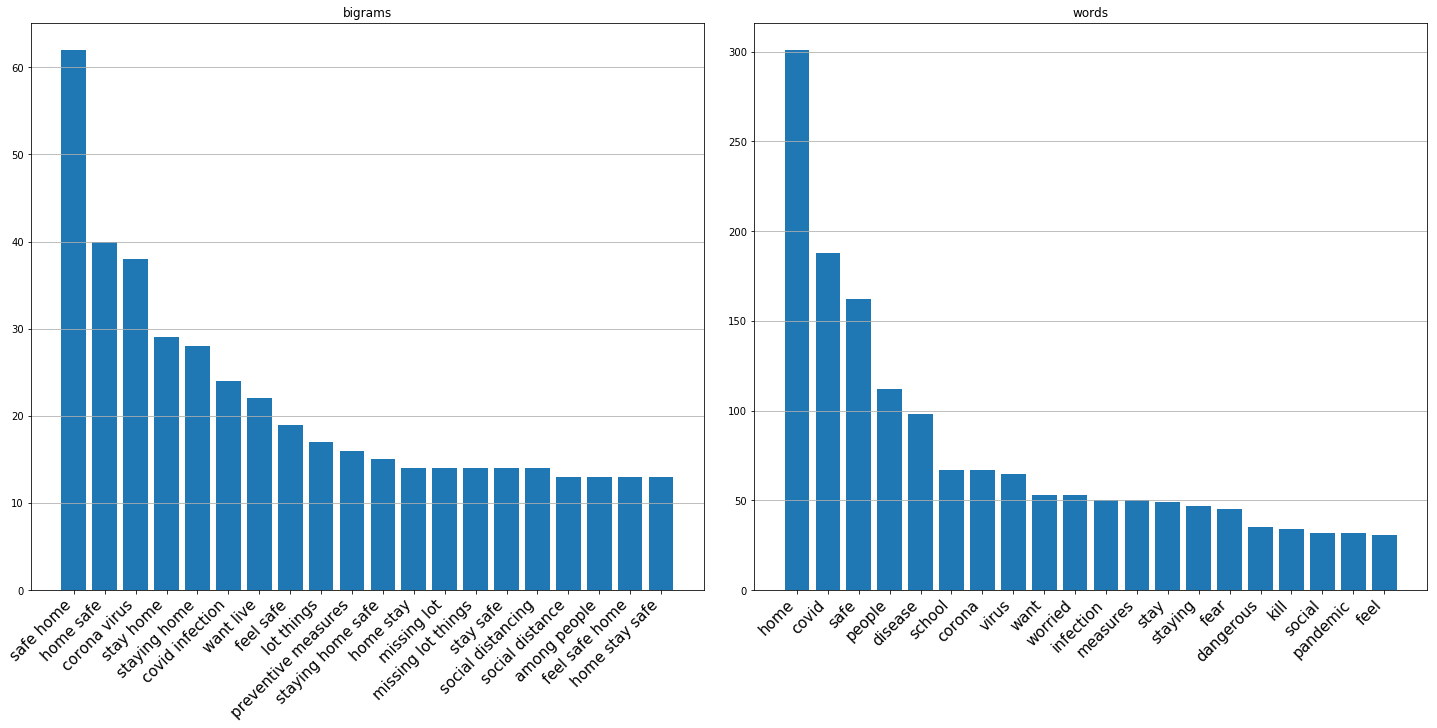

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [26]:
health_stop_words = ['home','staying','one','lot']

#### 3. Do you feel worried about your safety due to being at home during COVID-19? Why or why not?

In [27]:
home_safety_1 = bow_vectorization(data = home_safety.iloc[:,2], n_grams=(2, 3))
home_safety_2 = bow_vectorization(data = home_safety.iloc[:,2], n_grams=(1, 1))

3074 words in dictionary.
723 words in dictionary.


In [28]:
home_safety_1.sum().sort_values(ascending=False)[:25]

safe home              85
home safe              57
corona virus           46
feel safe              42
social distancing      40
staying home           37
stay home              35
feel safe home         33
staying home safe      21
preventive measures    19
safety measures        18
social distance        17
stay safe              17
home stay safe         15
stay home stay         15
home stay              15
fear corona            14
disease affect         13
come home              12
safe healthy           12
people home            12
home safe healthy      11
pandemic everywhere    11
wash hands             11
movements people       11
dtype: int64

In [29]:
home_safety_2.sum().sort_values(ascending=False)[:25]

home          401
safe          235
people        128
covid         117
disease        99
virus          94
corona         65
feel           64
social         63
measures       61
stay           57
fear           53
staying        45
safety         43
distancing     42
may            40
pandemic       35
come           35
know           33
school         33
place          31
everywhere     28
follow         27
house          27
hands          25
dtype: int64

In [30]:
words_graph = [dict(home_safety_1.sum().sort_values(ascending=False)[:20])] + [dict(home_safety_2.sum().sort_values(ascending=False)[:20])]

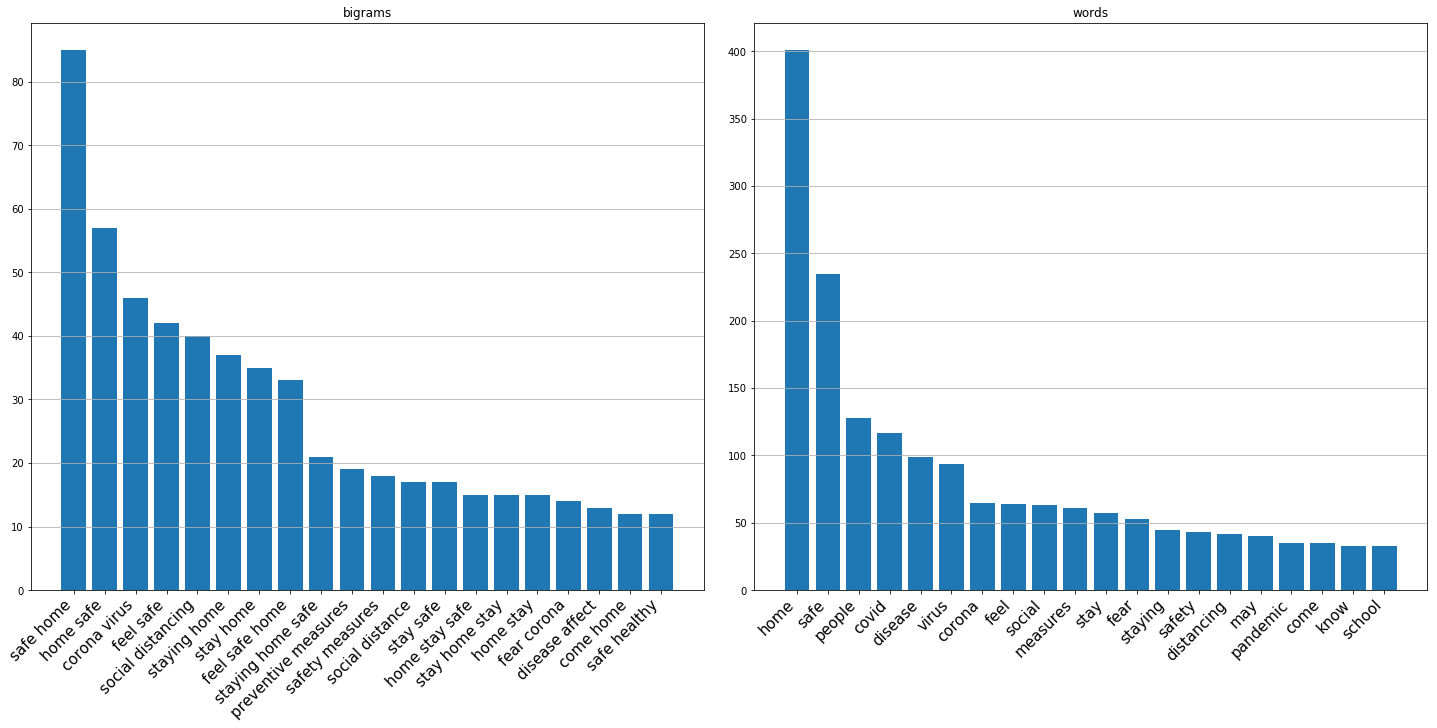

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [32]:
home_safety_stop_words = ['home','may']

#### 4. Are you/your learners learning more or are you learning less using radio lessons since the COVID-19 school closures? Why

In [33]:
quantity_learning_1 = bow_vectorization(data = quantity_learning.iloc[:,2], n_grams=(2, 3))
quantity_learning_2 = bow_vectorization(data = quantity_learning.iloc[:,2], n_grams=(1, 1))

2971 words in dictionary.
708 words in dictionary.


In [34]:
quantity_learning_1.sum().sort_values(ascending=False)[:25]

radio lessons           64
domestic work           36
radio home              34
engaged activities      28
time enough             25
listen radio            19
access radio            18
work home               17
time short              14
much work               14
time radio              13
engaged domestic        12
community activities    10
lack radio              10
much concentration      10
hard understand         10
radio program           10
time listen              9
lessons radio            8
domestic works           8
listening radio          8
lack radios              8
sometimes radio          8
difficult understand     7
radio lesson             7
dtype: int64

In [35]:
quantity_learning_2.sum().sort_values(ascending=False)[:25]

radio         337
time          190
lessons       138
home          130
work          103
school         84
enough         69
radios         60
activities     60
understand     58
sometimes      54
engaged        50
teacher        50
domestic       48
teachers       48
learners       45
much           42
learning       37
lack           36
listen         34
short          32
know           32
busy           31
less           30
program        28
dtype: int64

In [36]:
words_graph = [dict(quantity_learning_1.sum().sort_values(ascending=False)[:20])] + [dict(quantity_learning_2.sum().sort_values(ascending=False)[:20])]

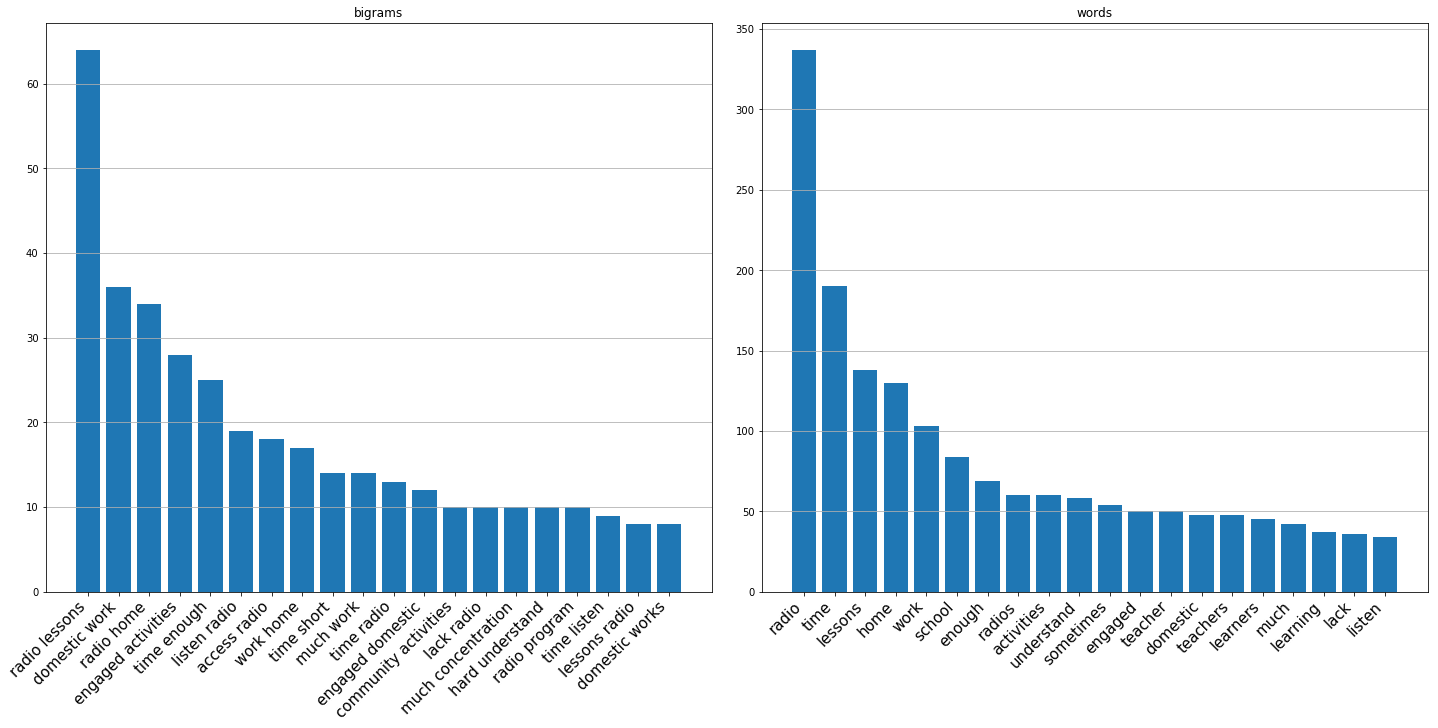

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [38]:
quantity_learning_stop_words = ['teachers','learning']

#### 5. What is the quality of the radio lessons? How can the radio lessons be improved?

In [39]:
radio_lessons_1 = bow_vectorization(data = radio_lessons.iloc[:,2], n_grams=(2, 3))
radio_lessons_2 = bow_vectorization(data = radio_lessons.iloc[:,2], n_grams=(1, 1))

4957 words in dictionary.
813 words in dictionary.


In [40]:
radio_lessons_1.sum().sort_values(ascending=False)[:25]

radio lessons               50
distribution radios         46
provision radios            39
radio coverage              35
radios learners             31
enough time                 31
radio distributed           25
provide radio               24
extension radio             23
extension radio coverage    23
radio needed                22
distributing radios         20
distribution radio          20
increase time               20
provide radios              20
radio learners              19
radios students             18
radio stations              17
time lessons                15
distribute radios           15
providing radios            14
give time                   13
given learners              13
local radios                13
provision radio             13
dtype: int64

In [41]:
radio_lessons_2.sum().sort_values(ascending=False)[:25]

radio           388
radios          292
time            230
lessons         145
learners        139
need             93
distribution     88
teachers         82
provide          71
coverage         67
provision        66
network          62
schools          60
lesson           57
improve          54
local            45
enough           45
increase         43
know             41
given            40
extension        40
students         40
improved         40
good             37
school           37
dtype: int64

In [42]:
words_graph = [dict(radio_lessons_1.sum().sort_values(ascending=False)[:20])] + [dict(radio_lessons_2.sum().sort_values(ascending=False)[:20])]

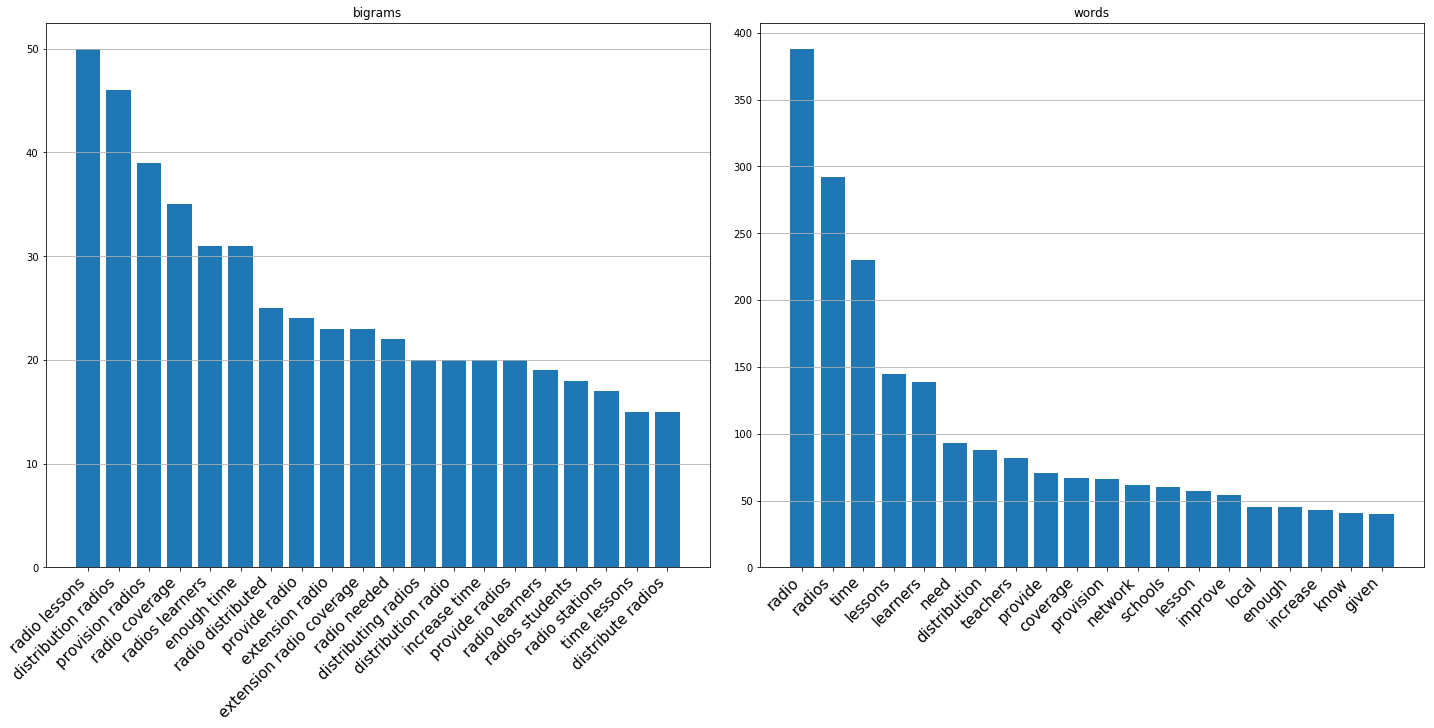

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.show()

#### More stop-words

In [44]:
radio_lessons_stop_words = ['radios','school']

#### 6. What do you like most about the radio lessons? What are the challenges with learning on the radio?

In [45]:
radio_likes_1 = bow_vectorization(data = radio_likes.iloc[:,2], n_grams=(2, 3))
radio_likes_2 = bow_vectorization(data = radio_likes.iloc[:,2], n_grams=(1, 1))

5618 words in dictionary.
862 words in dictionary.


In [46]:
radio_likes_1.sum().sort_values(ascending=False)[:25]

lack radios                45
lack radio                 40
radio lessons              36
ask questions              30
radio battery              29
network problem            27
poor network               25
radio home                 22
limited time               20
hard understand            19
time enough                17
radio coverage             17
difficult ask              17
difficult understand       17
time limited               16
net work                   15
radio program              14
asking questions           13
ask question               13
lack power                 13
access radio               12
difficult ask questions    12
sometimes radio            12
asks questions             11
time short                 11
dtype: int64

In [47]:
radio_likes_2.sum().sort_values(ascending=False)[:25]

radio         404
time          199
lack          149
radios        122
lessons       107
understand    107
network       106
power          89
questions      87
sometimes      85
poor           85
battery        81
learners       78
difficult      65
ask            63
teacher        57
enough         51
teachers       51
fast           49
problem        47
hard           46
lesson         46
phone          46
challenges     41
limited        40
dtype: int64

In [48]:
words_graph = [dict(radio_likes_1.sum().sort_values(ascending=False)[:20])] + [dict(radio_likes_2.sum().sort_values(ascending=False)[:20])]

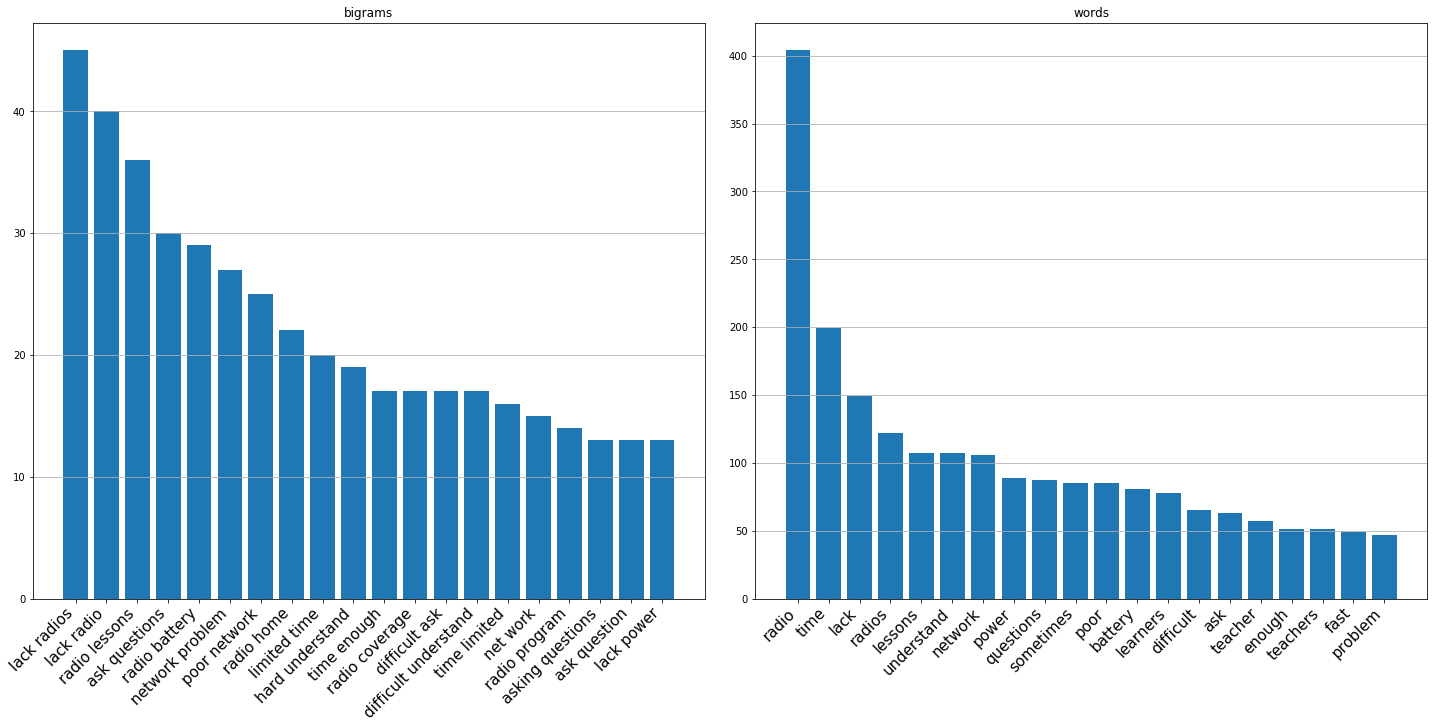

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [50]:
radio_likes_stop_words = ['radios','lesson']

#### 7.a. When schools re-open, do you think your school will have measures in place to ensure a safe learning environment? Why or why not?

In [51]:
school_safety.iloc[:,[1,2]]

,"Q61_When schools re-open, do you think your school will have measures in place to ensure a safe learning environment?",Q62_Why or why not?
0,Yes,Because we shall follow classroom rules and sc...
1,Yes,Creation of structures and routines in the school
2,Somewhat,Keeping classroom clean orderly
3,Yes,Creation of classroom safety rules
4,Yes,Following the rules and regulations of school
...,...,...
4722,Yes,The teachers will give proper guidelines
4723,Yes,The teachers will direct the Learners
4724,Yes,The teachers will guide the Learners to stay safe
4725,Yes,The SMC members will work together with the te...


In [52]:
school_safety_1 = bow_vectorization(data = school_safety.iloc[:,2], n_grams=(2, 3))
school_safety_2 = bow_vectorization(data = school_safety.iloc[:,2], n_grams=(1, 1))

9008 words in dictionary.
1196 words in dictionary.


In [53]:
school_safety_1.sum().sort_values(ascending=False)[:25]

hand washing                    203
washing facilities              190
hand washing facilities         142
social distancing               131
school administration           108
social distance                  86
ensure safety                    85
school environment               83
safety learners                  78
administration ensure            75
school administration ensure     75
ensure safety learners           74
administration ensure safety     69
measures covid                   65
face masks                       65
preventive measures              61
face mask                        59
corona virus                     59
measures place                   58
safe learning                    50
keep school                      46
put place                        42
keep social                      40
learning environment             39
know school                      39
dtype: int64

In [54]:
school_safety_2.sum().sort_values(ascending=False)[:25]

school            1057
know               637
covid              345
measures           319
facilities         316
washing            302
environment        236
social             235
hand               231
learners           230
safe               221
teachers           204
place              202
safety             192
keep               153
distancing         144
learning           135
ensure             134
face               131
put                130
corona             124
enough             120
sure               118
administration     115
clean              114
dtype: int64

In [55]:
words_graph = [dict(school_safety_1.sum().sort_values(ascending=False)[:20])] + [dict(school_safety_2.sum().sort_values(ascending=False)[:20])]

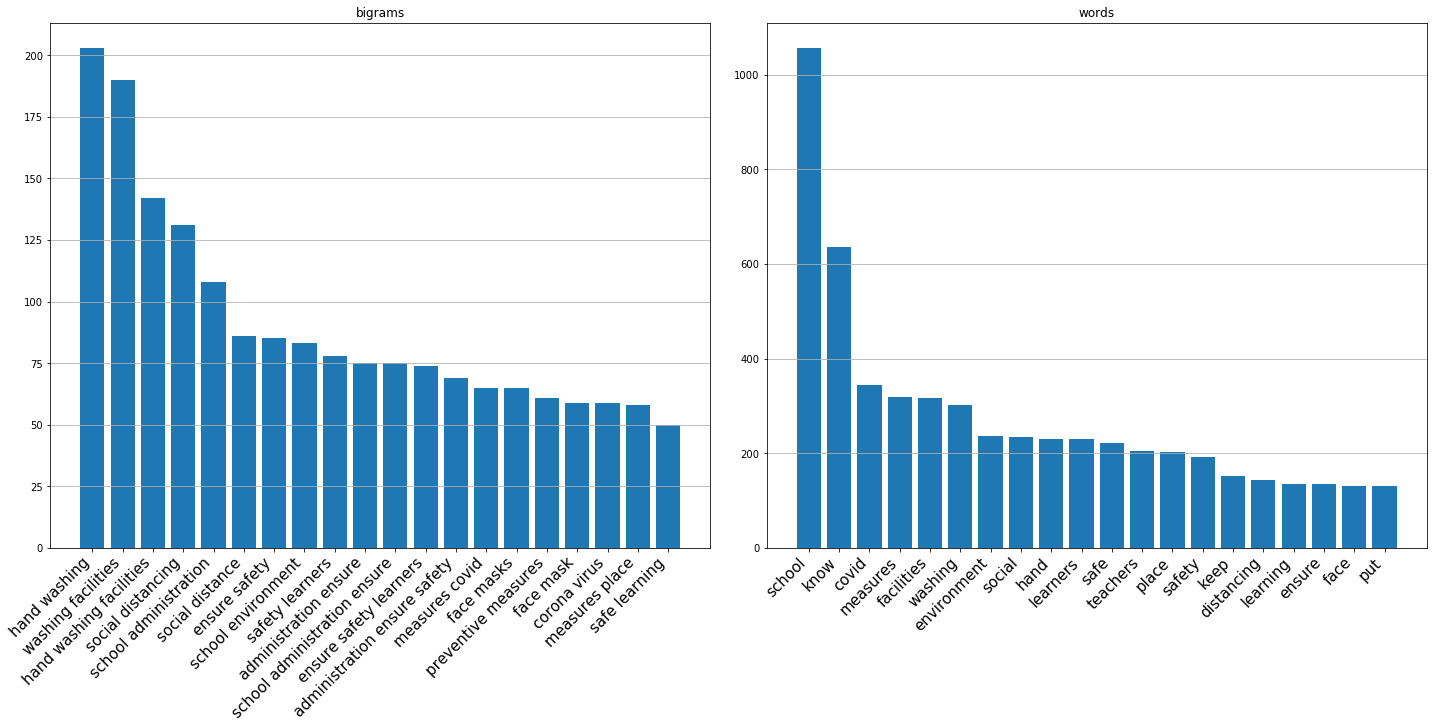

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [57]:
school_safety_stop_words = ['safety']

#### 7.b. What are your concerns about returning to school?

In [58]:
school_safety_1b = bow_vectorization(data = school_safety.iloc[:,3], n_grams=(2, 3))
school_safety_2b = bow_vectorization(data = school_safety.iloc[:,3], n_grams=(1, 1))

10312 words in dictionary.
1303 words in dictionary.


In [59]:
school_safety_1b.sum().sort_values(ascending=False)[:25]

back school               432
go back                   407
go back school            340
school open               196
schools open              186
schools reopen            170
corona virus              168
let schools               148
corona virus infection    108
virus infection           108
continue studies          106
children go               100
virus infection fear       96
infection fear             96
school reopen              90
children go back           80
ready go                   79
let schools reopen         75
ready go back              72
next year                  71
need school                70
return school              69
reopen schools             67
schools opened             63
let schools open           58
dtype: int64

In [60]:
school_safety_2b.sum().sort_values(ascending=False)[:25]

school        1332
schools        679
back           530
go             486
open           468
reopen         380
good           365
children       364
need           308
let            270
continue       220
want           217
studies        192
corona         189
virus          176
learning       167
year           155
learn          153
ready          149
learners       133
government     130
fear           130
concern        116
education      112
infection      112
dtype: int64

In [61]:
words_graph = [dict(school_safety_1b.sum().sort_values(ascending=False)[:20])] + [dict(school_safety_2b.sum().sort_values(ascending=False)[:20])]

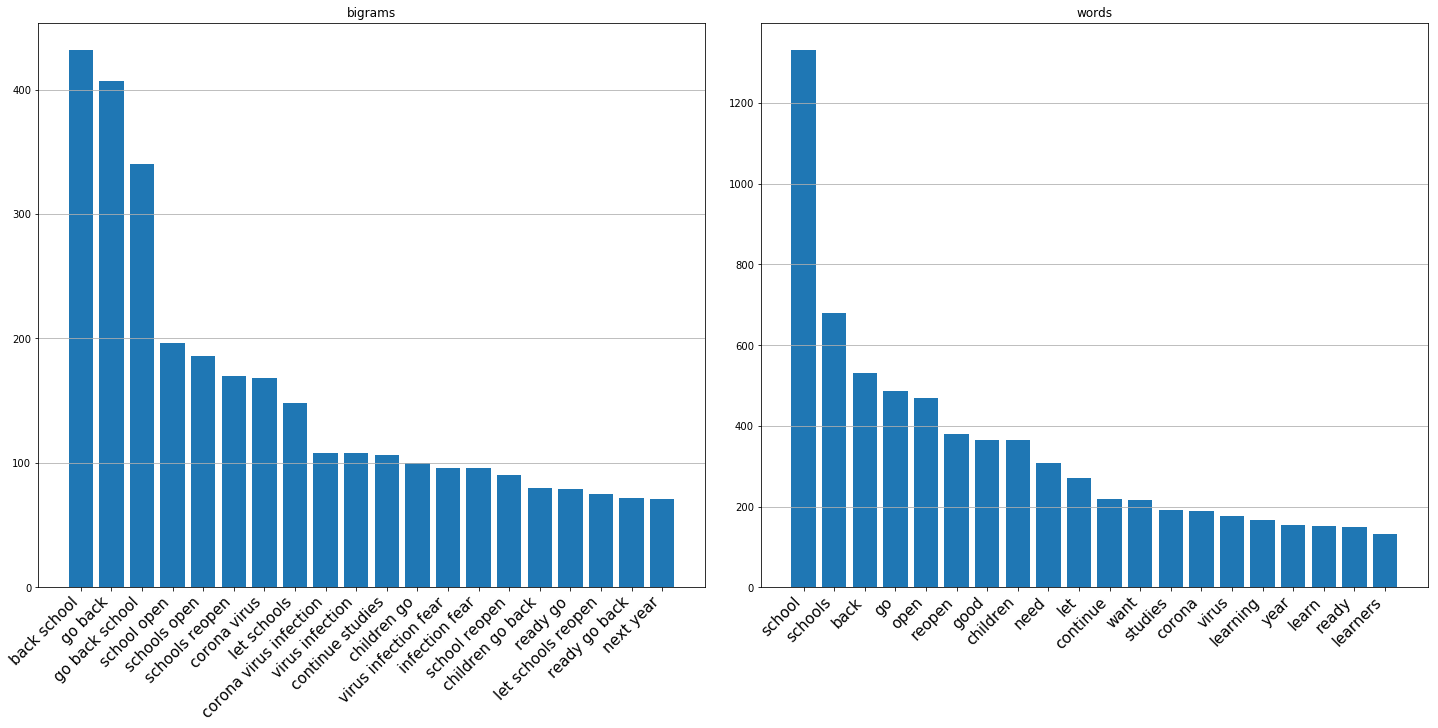

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [63]:
school_safety_b_stop_words = ['schools','go','back','reopen','let']

#### 8. Are you/your learners doing more schoolwork or less schoolwork since the COVID-19 school closures? Why?

In [64]:
schoolwork_1 = bow_vectorization(data = schoolwork.iloc[:,-1], n_grams=(2, 3))
schoolwork_2 = bow_vectorization(data = schoolwork.iloc[:,-1], n_grams=(1, 1))

3343 words in dictionary.
744 words in dictionary.


In [65]:
schoolwork_1.sum().sort_values(ascending=False)[:25]

domestic work           65
work home               61
engaged activities      34
additional work         17
schools closed          16
radio lessons           15
lot work                15
much work               14
home activities         14
extra work              14
house work              14
home work               13
additional work home    12
activities home         12
engaged domestic        12
extra work home         11
much domestic work      11
much domestic           11
school work             11
garden work             10
heard get                9
present teacher          9
busy home                9
time engaged             9
much work home           8
dtype: int64

In [66]:
schoolwork_2.sum().sort_values(ascending=False)[:25]

home          236
work          232
school        179
time          130
activities    103
domestic       76
radio          71
teachers       71
engaged        71
learners       59
teacher        59
much           58
schools        52
enough         48
help           45
learning       43
lessons        42
busy           40
things         36
children       36
materials      34
lot            31
lack           29
one            28
due            28
dtype: int64

In [67]:
words_graph = [dict(schoolwork_1.sum().sort_values(ascending=False)[:20])] + [dict(schoolwork_2.sum().sort_values(ascending=False)[:20])]

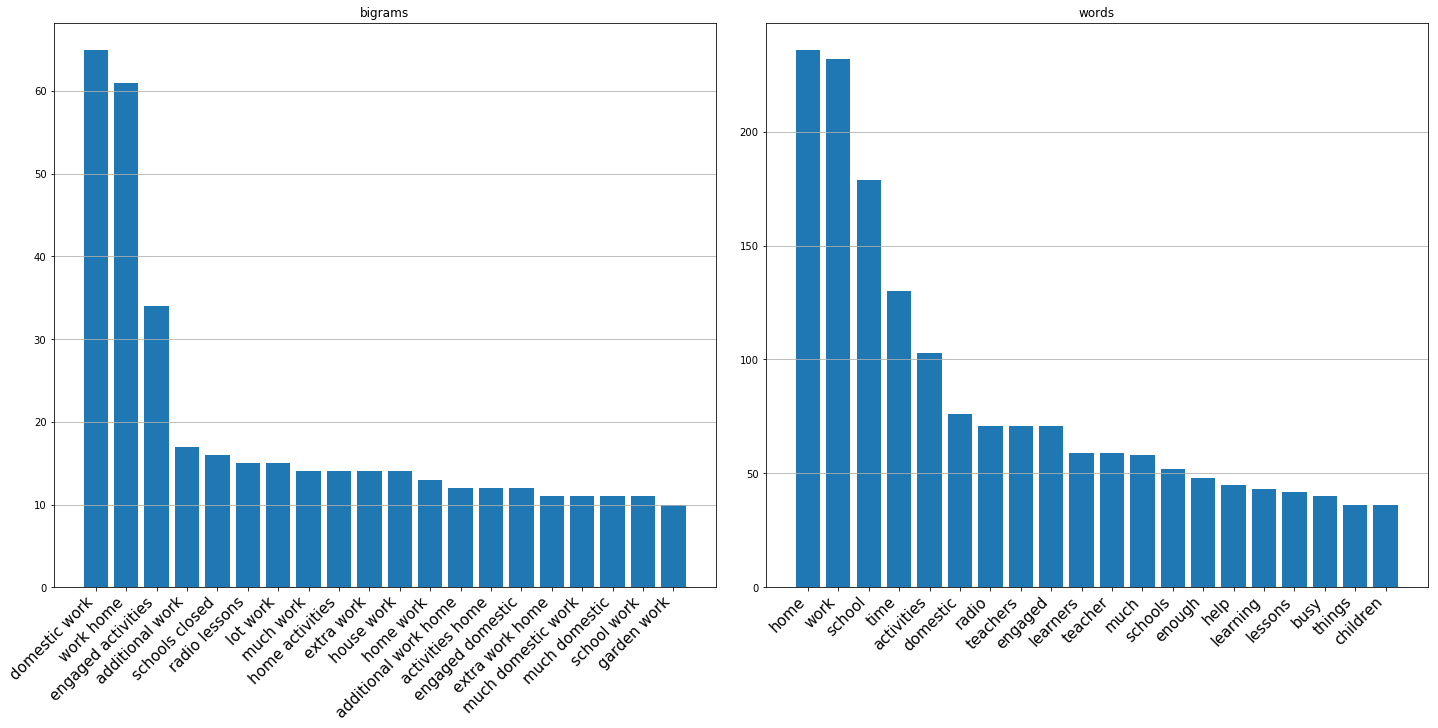

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [69]:
schoolwork_stop_words = ['home','teacher','schools','one']

#### 9. When schools reopen, would you still listen to radio lessons? Why or why not?

In [70]:
radio_school_1 = bow_vectorization(data = radio_school.iloc[:,-1], n_grams=(2, 3))
radio_school_2 = bow_vectorization(data = radio_school.iloc[:,-1], n_grams=(1, 1))

2781 words in dictionary.
585 words in dictionary.


In [71]:
radio_school_1.sum().sort_values(ascending=False)[:25]

radio lessons               55
busy school                 31
get knowledge               27
teachers school             26
teachers already            22
school open                 22
time listen                 19
listen radio                19
school teach                18
school opened               17
going school                16
get information             15
add knowledge               14
radio lesson                14
teachers school teach       14
additional knowledge        13
teachers already schools    13
taught school               13
go school                   13
already schools             13
school lessons              13
learn radio                 11
lessons school              11
increase knowledge          11
listening radio             11
dtype: int64

In [72]:
radio_school_2.sum().sort_values(ascending=False)[:25]

school         316
radio          175
lessons        159
knowledge      135
time           126
get            104
teachers        93
learn           85
busy            70
information     68
learners        62
class           61
schools         55
children        53
learning        52
need            52
listen          51
lesson          46
good            44
help            42
concentrate     34
teaching        34
listening       34
want            33
things          32
dtype: int64

In [73]:
words_graph = [dict(radio_school_1.sum().sort_values(ascending=False)[:20])] + [dict(radio_school_2.sum().sort_values(ascending=False)[:20])]

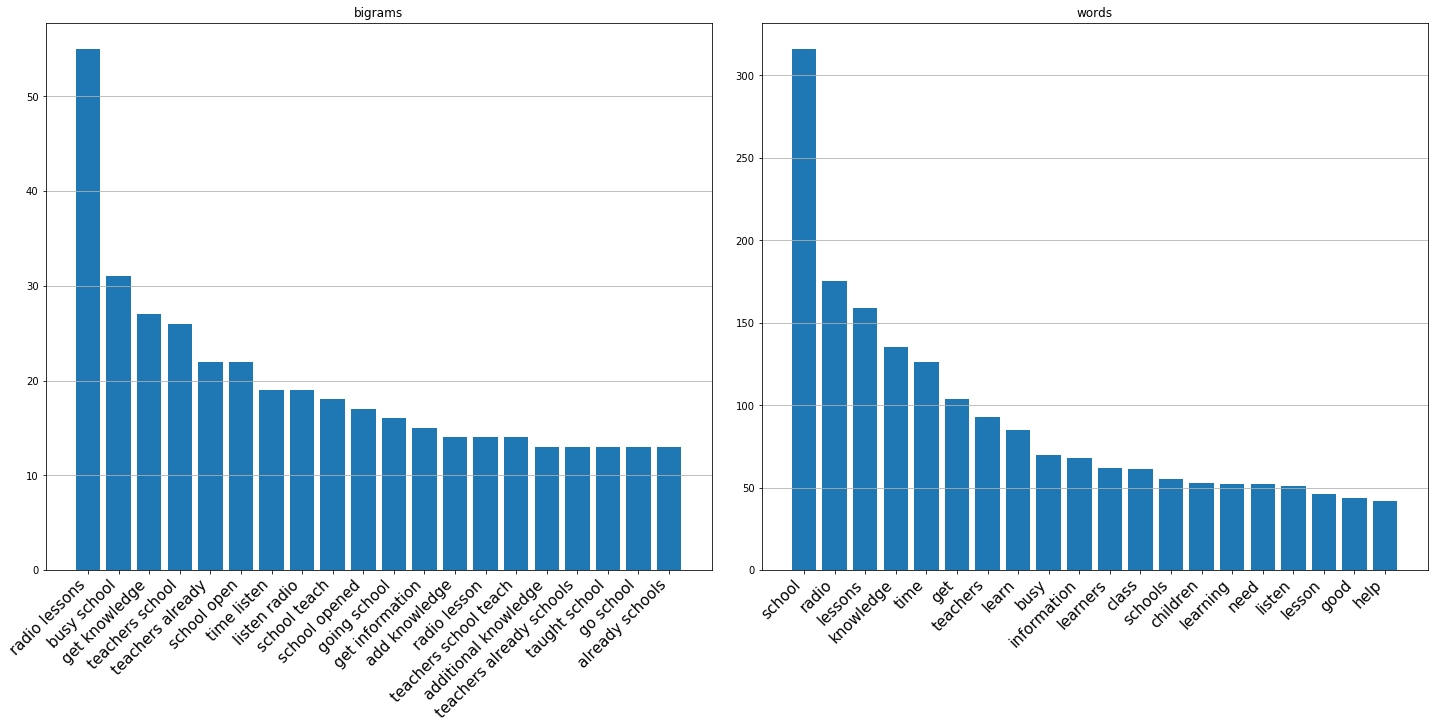

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [75]:
radio_school_stop_words = ['get','learning','listening']

#### 10. What materials are you using? How often do you use these materials? Do you find these materials more or less helpful than radio lessons? Why?

In [76]:
learning_mat_1 = bow_vectorization(data = learning_mat.iloc[:,-1], n_grams=(2, 3))
learning_mat_2 = bow_vectorization(data = learning_mat.iloc[:,-1], n_grams=(1, 1))

3547 words in dictionary.
719 words in dictionary.


In [77]:
learning_mat_1.sum().sort_values(ascending=False)[:25]

easy understand          82
radio lessons            82
well summarized          24
listen radio             24
radio lesson             24
text books               17
previous work            15
understand radio         15
listening radio          15
keeps busy               15
domestic work            14
present teacher          14
enough time              13
understand better        13
like reading             13
helpful radio            13
one help                 12
taught school            12
like radio               12
radio home               12
text book                11
helpful radio lessons    11
teacher good             10
time radio               10
hard understand          10
dtype: int64

In [78]:
learning_mat_2.sum().sort_values(ascending=False)[:25]

radio         323
understand    219
lessons       123
time          107
easy           97
teacher        92
one            86
school         81
home           74
reading        70
read           67
help           67
enough         66
work           64
books          59
better         48
like           45
well           44
things         42
get            40
good           40
keeps          37
helpful        35
lesson         33
alone          32
dtype: int64

In [79]:
words_graph = [dict(learning_mat_1.sum().sort_values(ascending=False)[:20])] + [dict(learning_mat_2.sum().sort_values(ascending=False)[:20])]

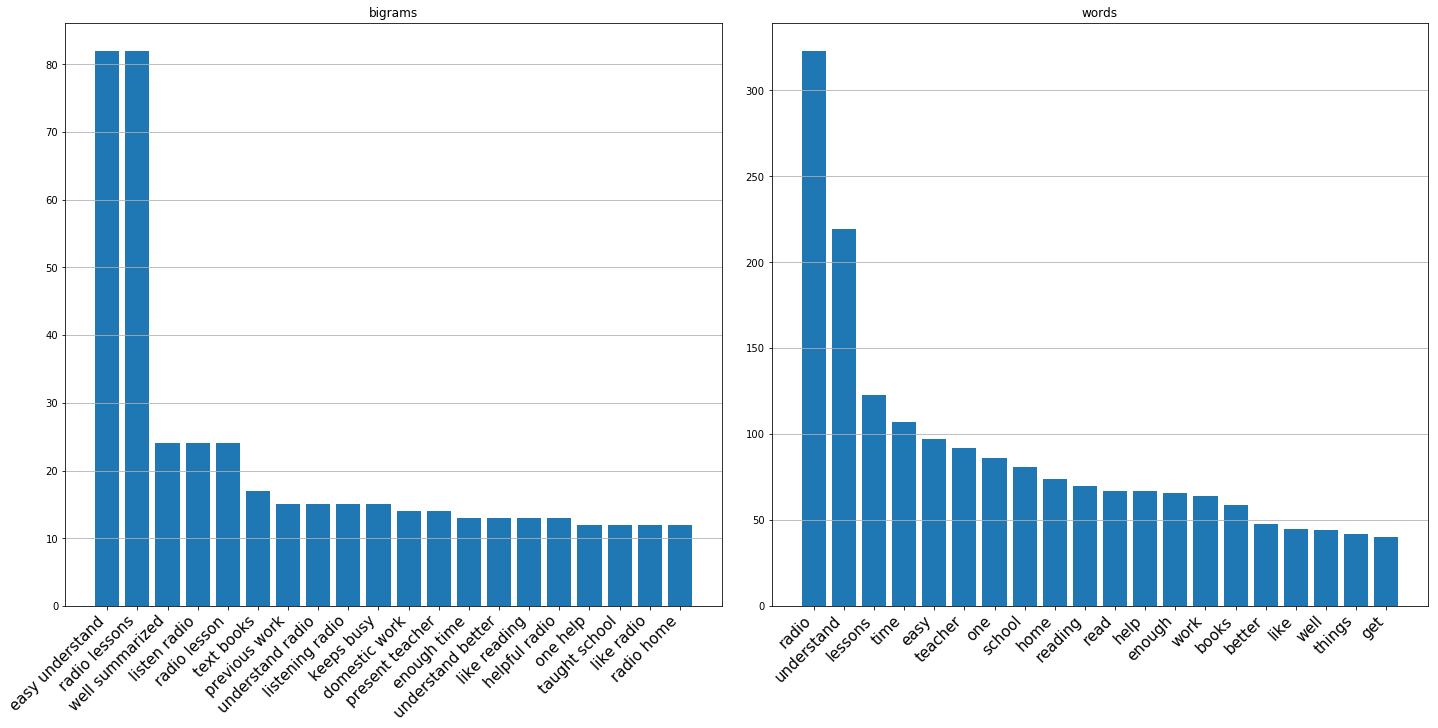

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(20,10))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right', fontsize=15)
    ax.set_title(['bigrams','words'][index])

plt.xticks(rotation=45)
plt.show()

#### More stop-words

In [81]:
learning_mat_stop_words = ['read']

## Bag of Words refinement

In [82]:
activities_2.drop(activities_stop_words, axis=1, inplace=True)
activities_2.to_csv('data/tokens/activities_tokens.csv')

In [83]:
health_2.drop(health_stop_words, axis=1, inplace=True)
health_2.to_csv('data/tokens/health_tokens.csv')

In [84]:
home_safety_2.drop(home_safety_stop_words, axis=1,inplace=True)
home_safety_2.to_csv('data/tokens/home_safety_tokens.csv')

In [85]:
quantity_learning_2.drop(quantity_learning_stop_words, axis=1, inplace=True)
quantity_learning_2.to_csv('data/tokens/quantity_learning_tokens.csv')

In [86]:
radio_lessons_2.drop(radio_lessons_stop_words, axis=1, inplace=True)
radio_lessons_2.to_csv('data/tokens/radio_lessons_tokens.csv')

In [87]:
radio_likes_2.drop(radio_likes_stop_words, axis=1,inplace=True)
radio_likes_2.to_csv('data/tokens/radio_likes_tokens.csv')

In [88]:
school_safety_2.drop(school_safety_stop_words, axis=1, inplace=True)
school_safety_2.to_csv('data/tokens/school_safety_tokens.csv')

In [89]:
school_safety_2b.drop(school_safety_stop_words, axis=1, inplace=True)
school_safety_2b.to_csv('data/tokens/school_safety_b_tokens.csv')

In [90]:
schoolwork_2.drop(schoolwork_stop_words, axis=1, inplace=True)
schoolwork_2.to_csv('data/tokens/schoolwork_tokens.csv')

In [91]:
learning_mat_2.drop(learning_mat_stop_words, axis=1, inplace=True)
learning_mat_2.to_csv('data/tokens/learning_mat_tokens.csv')

In [92]:
radio_school_2.drop(radio_school_stop_words, axis=1, inplace=True)
radio_school_2.to_csv('data/tokens/radio_school_tokens.csv')